# Udacity Data Scientist Nanodegree - Project 1 (Data Science Blog Post)

## Hotels in Saudi Arabia

This notebook aims to understand the hotel services in Saudi Arabia by answering the following questions:
1. What is the average customer-ratings of hotels in Riyadh
2. Do high-priced hotels relate to customer ratings?
3. What are the best Saudi Arabian cities in hotel prices?


**Outline:**
1. Data Aquisition
2. Exploring the Data
3. Question 1: What is the average customer-ratings of hotels in Riyadh
4. Question 2: Do high-priced hotels relate to customers' ratings?
5. Question 3: What are the worst Saudi Arabian cities in hotel prices?


------
### 1. Data Aquisition
The dataset comprises 1025 hotels in Saudi Arabia collected on 24 Apr 2020 from Booking.com.

Author: Moayad Magadmi

Link: https://www.kaggle.com/moayadmagadmi/saudi-arabia-bookingcom

In [167]:
# import the required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as plt
from matplotlib.colors import ListedColormap
%matplotlib inline  

-----
### 2. Exploring the Data

In [100]:
# import the dataset and view it
df = pd.read_csv('Saudi_Arabia_Hotels.csv')
df.head()

,Unnamed: 0,Name,City,Price,Star_Rating,Property_Demand,Property_id,Customers_Rating,Customers_Review,Type_of_room,...,Canelation,Max_persons,Bed_type,Tax,Review_title,Credit_card,Breakfst_included,Longitude_x,Latitude_y,Link
0,0,الريـم,Al Ula,SAR 179,5,Only 1 room left like this on our site,6330099,NaN,NaN,Economy Double Room,...,FREE cancellation,Max persons: 2,3 beds\n(3 large doubles),+SAR 0 taxes and charges,NaN,Reservation possible without a credit card,NaN,37.917525,26.648656,https://www.booking.com/hotel/sa/lrym.en-gb.ht...
1,1,Copper Crown Furnished Apartments,Khamis Mushayt,SAR 195,5,Only 2 rooms like this left on our site,5326174,9.0,169 reviews,Deluxe Room (2 Adults + 1 Child),...,FREE cancellation,Max persons: 2,1 bed\n(1 extra-large double),includes taxes and charges,Superb,Reservation possible without a credit card,NaN,42.801402,18.242741,https://www.booking.com/hotel/sa/kwbr-krwn-lls...
2,2,فندق راية الشلال 2,Abū Qa‘ar,SAR 200,5,Only 3 rooms like this left on our site,5987844,8.7,17 reviews,Deluxe Double or Twin Room,...,FREE cancellation,Max persons: 2,1 bed\n(1 double),+SAR 0 taxes and charges,Fabulous,Reservation possible without a credit card,NaN,45.990981,28.370666,https://www.booking.com/hotel/sa/fndq-ry-lshll...
3,3,Four Points by Sheraton Makkah Al Naseem,Makkah,SAR 225,5,Only 5 rooms like this left on our site,3889445,8.7,"9,418 reviews",Superior Twin Room,...,FREE cancellation,Max persons: 2,2 beds\n(2 singles),+SAR 23 taxes and charges,Fabulous,NaN,NaN,39.874312,21.380810,https://www.booking.com/hotel/sa/four-points-b...
4,4,نزل الثريا للوحدات السكنية,Taif,SAR 250,5,NaN,6284346,NaN,NaN,Budget Double Room,...,FREE cancellation,Max persons: 2,1 bed\n(1 double),includes taxes and charges,NaN,Reservation possible without a credit card,NaN,40.487383,21.494524,https://www.booking.com/hotel/sa/nzl-lthry-llw...


In [51]:
# Explore the columns and null values in the dataset
print(df.isnull().mean())

Unnamed: 0              0.000000
Name                    0.000000
City                    0.000000
Price                   0.000000
Star_Rating             0.000000
Property_Demand         0.268293
Property_id             0.000000
Customers_Rating        0.067317
Customers_Review        0.067317
Type_of_room            0.000976
reservations_Payment    0.282927
Canelation              0.174634
Max_persons             0.000000
Bed_type                0.018537
Tax                     0.000000
Review_title            0.067317
Credit_card             0.313171
Breakfst_included       0.918049
Longitude_x             0.000000
Latitude_y              0.000000
Link                    0.000000
dtype: float64


---
### 3. Question 1: What is the average customers' rating of hotels in Riyadh 

In [53]:
# Filter the data so it only contains the hotels data in Riyadh
riyadh_data = df[df['City'].str.contains("Riyadh")] # Notice that some of the districts' names are included in the City column
# Fill the N/A values in Customers_Rating column with the mean
riyadh_data.loc[:, 'Customers_Rating'] = riyadh_data['Customers_Rating'].fillna(riyadh_data['Customers_Rating'].mean)
# Make sure there is no missing data in the Customers_Rating Column
print(riyadh_data.isnull().sum())

Unnamed: 0                0
Name                      0
City                      0
Price                     0
Star_Rating               0
Property_Demand          49
Property_id               0
Customers_Rating          0
Customers_Review         11
Type_of_room              0
reservations_Payment     37
Canelation               20
Max_persons               0
Bed_type                  6
Tax                       0
Review_title             11
Credit_card              58
Breakfst_included       156
Longitude_x               0
Latitude_y                0
Link                      0
dtype: int64


In [54]:
# Explore the data types of the dataset
riyadh_data.dtypes

Unnamed: 0                int64
Name                     object
City                     object
Price                    object
Star_Rating               int64
Property_Demand          object
Property_id               int64
Customers_Rating         object
Customers_Review         object
Type_of_room             object
reservations_Payment     object
Canelation               object
Max_persons              object
Bed_type                 object
Tax                      object
Review_title             object
Credit_card              object
Breakfst_included        object
Longitude_x             float64
Latitude_y              float64
Link                     object
dtype: object

After exploring the dataframe's data types, the customers' rating column seems to be of type string. So, to do some caluculations on it, it has to be converted to float.

In [55]:
# Convert Customers_Rating column to float data type
riyadh_data.loc[:,'Customers_Rating'] = pd.to_numeric(riyadh_data.loc[:,'Customers_Rating'], errors='coerce')
riyadh_data.dtypes

Unnamed: 0                int64
Name                     object
City                     object
Price                    object
Star_Rating               int64
Property_Demand          object
Property_id               int64
Customers_Rating        float64
Customers_Review         object
Type_of_room             object
reservations_Payment     object
Canelation               object
Max_persons              object
Bed_type                 object
Tax                      object
Review_title             object
Credit_card              object
Breakfst_included        object
Longitude_x             float64
Latitude_y              float64
Link                     object
dtype: object

In [56]:
Q1 = riyadh_data.groupby("Star_Rating")['Customers_Rating'].mean()
print(Q1)

Star_Rating
0    6.558108
2    7.025000
3    7.634615
4    7.918421
5    8.243750
Name: Customers_Rating, dtype: float64


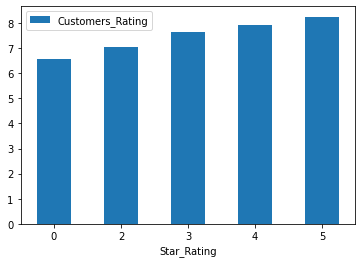

In [57]:
ax = Q1.plot.bar(x='Star_Rating', y='Customers_Rating', rot=0)
ax.legend(['Customers_Rating'])

**The Conclusion:**

The average customers' ratings for Riyadh's hotels are as the preceding table. Also, as anticipated, as the star rating increases, the customers rating increases too. 

---
### 4. Question 2: Do high-priced hotels relate to customers' ratings?

In [58]:
# Make a copy of the dataset for Question 2
relationship_data = df
# Fill the N/A values in Customers_Rating column with the mean
relationship_data.loc[:, 'Customers_Rating'] = relationship_data['Customers_Rating'].fillna(relationship_data['Customers_Rating'].mean)
# Make sure there is no missing data in the Customers_Rating Column
print(relationship_data.isnull().sum())

Unnamed: 0                0
Name                      0
City                      0
Price                     0
Star_Rating               0
Property_Demand         275
Property_id               0
Customers_Rating          0
Customers_Review         69
Type_of_room              1
reservations_Payment    290
Canelation              179
Max_persons               0
Bed_type                 19
Tax                       0
Review_title             69
Credit_card             321
Breakfst_included       941
Longitude_x               0
Latitude_y                0
Link                      0
dtype: int64


In [59]:
# Drop unwanted columns
relationship_data.drop(relationship_data.columns[[0]], axis = 1, inplace = True)
# Convert Customers_Rating column to float data type
relationship_data.loc[:,'Customers_Rating'] = pd.to_numeric(relationship_data.loc[:,'Customers_Rating'], errors='coerce')
# Delete the pattern SAR from column Price
relationship_data['Price'] = relationship_data['Price'].str.replace('SAR', '')
# Convert Price column to float data type
relationship_data.loc[:,'Price'] = pd.to_numeric(relationship_data.loc[:,'Price'], errors='coerce')
relationship_data.dtypes

Name                     object
City                     object
Price                   float64
Star_Rating               int64
Property_Demand          object
Property_id               int64
Customers_Rating        float64
Customers_Review         object
Type_of_room             object
reservations_Payment     object
Canelation               object
Max_persons              object
Bed_type                 object
Tax                      object
Review_title             object
Credit_card              object
Breakfst_included        object
Longitude_x             float64
Latitude_y              float64
Link                     object
dtype: object

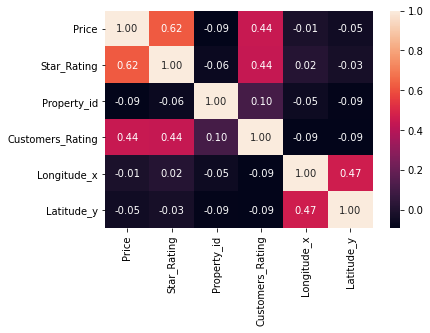

In [60]:
# Compute the correlation between the features and plot a heatmap
sns.heatmap(relationship_data.corr(), annot=True, fmt=".2f");

**The Conclusion:**

The value 0.44 suggest a weak positive correlation between the customers' ratings and the hotels' prices. On the other hand, as expected, the star rating moderately relate to the prices.

---
### 5. Question 3: What are the Worst Saudi Arabian cities in hotel prices?

In [101]:
# Make a copy of the dataset
best_prices = df
# Drop unwanted columns
best_prices.drop(best_prices.columns[[0]], axis = 1, inplace = True)
# Delete the pattern SAR from column Price
best_prices['Price'] = best_prices['Price'].str.replace('SAR', '')
# Convert Price column to float data type
best_prices.loc[:,'Price'] = pd.to_numeric(best_prices.loc[:,'Price'], errors='coerce')

In [154]:
# Clean up the City column
best_prices['new_City']=np.nan
for city in ["Riyadh", "Jeddah", "Madinah", "Makkah", "Abha", "Hail", "Khobar"]:
    for i in best_prices.index:
        if city in best_prices['City'][i]:
            best_prices.loc[i,'new_City'] =  city
        else:
            best_prices.loc[i,'new_City'] =  best_prices['City'][i]

In [155]:
best_prices

,Name,City,Price,Star_Rating,Property_Demand,Property_id,Customers_Rating,Customers_Review,Type_of_room,reservations_Payment,...,Max_persons,Bed_type,Tax,Review_title,Credit_card,Breakfst_included,Longitude_x,Latitude_y,Link,new_City
0,الريـم,Al Ula,179.0,5,Only 1 room left like this on our site,6330099,NaN,NaN,Economy Double Room,No prepayment needed,...,Max persons: 2,3 beds\n(3 large doubles),+SAR 0 taxes and charges,NaN,Reservation possible without a credit card,NaN,37.917525,26.648656,https://www.booking.com/hotel/sa/lrym.en-gb.ht...,Al Ula
1,Copper Crown Furnished Apartments,Khamis Mushayt,195.0,5,Only 2 rooms like this left on our site,5326174,9.0,169 reviews,Deluxe Room (2 Adults + 1 Child),No prepayment needed,...,Max persons: 2,1 bed\n(1 extra-large double),includes taxes and charges,Superb,Reservation possible without a credit card,NaN,42.801402,18.242741,https://www.booking.com/hotel/sa/kwbr-krwn-lls...,Khamis Mushayt
2,فندق راية الشلال 2,Abū Qa‘ar,200.0,5,Only 3 rooms like this left on our site,5987844,8.7,17 reviews,Deluxe Double or Twin Room,No prepayment needed,...,Max persons: 2,1 bed\n(1 double),+SAR 0 taxes and charges,Fabulous,Reservation possible without a credit card,NaN,45.990981,28.370666,https://www.booking.com/hotel/sa/fndq-ry-lshll...,Abū Qa‘ar
3,Four Points by Sheraton Makkah Al Naseem,Makkah,225.0,5,Only 5 rooms like this left on our site,3889445,8.7,"9,418 reviews",Superior Twin Room,NaN,...,Max persons: 2,2 beds\n(2 singles),+SAR 23 taxes and charges,Fabulous,NaN,NaN,39.874312,21.380810,https://www.booking.com/hotel/sa/four-points-b...,Makkah
4,نزل الثريا للوحدات السكنية,Taif,250.0,5,NaN,6284346,NaN,NaN,Budget Double Room,No prepayment needed,...,Max persons: 2,1 bed\n(1 double),includes taxes and charges,NaN,Reservation possible without a credit card,NaN,40.487383,21.494524,https://www.booking.com/hotel/sa/nzl-lthry-llw...,Taif
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,Al Corniche Hotel Suites & Villas,Hail,133.0,0,Only 5 like this left on our site,737295,7.5,193 reviews,Twin Room,No prepayment needed,...,Max persons: 2,2 beds\n(2 singles),includes taxes and charges,Good,Reservation possible without a credit card,NaN,41.691796,27.469497,https://www.booking.com/hotel/sa/ossuuuo-uuo-u...,Hail
1021,Golden Tower Hotel,Al Jubail,134.0,0,NaN,3418383,7.2,421 reviews,Deluxe Double Room (2 Adults + 1 Child),No prepayment needed,...,Max persons: 2,1 bed\n(1 double),+SAR 10 taxes and charges,Good,Reservation possible without a credit card,NaN,49.656744,26.989869,https://www.booking.com/hotel/sa/golden-tower....,Al Jubail
1022,Drr Ramah Suites 2,Riyadh,134.0,0,Only 3 like this left on our site,371101,6.5,194 reviews,King Studio,NaN,...,Max persons: 2,1 bed\n(1 double),+SAR 7 taxes and charges,Review score,Reservation possible without a credit card,NaN,46.668347,24.765365,https://www.booking.com/hotel/sa/dorrar-ramah....,Riyadh
1023,Taj Al Khaleej Furnished Units 2,Ţurayf,135.0,0,Only 1 left like this on our site,3445586,8.9,122 reviews,Deluxe Apartment,No prepayment needed,...,Max persons: 2,1 bed\n(1 extra-large double),+SAR 0 taxes and charges,Fabulous,Reservation possible without a credit card,NaN,38.671166,31.655781,https://www.booking.com/hotel/sa/tj-lkhlyj-llw...,Ţurayf


In [239]:
# Group by the Cities 
Q3 = best_prices.groupby(["new_City","Star_Rating"])['Price'].mean().to_frame()
# Save the results to a csv file
Q3.to_csv('Q3.csv')
print(Q3)

                                Price
new_City      Star_Rating            
 Abū Qa‘ar    0            110.000000
              5            200.000000
 Ad Darb      0            133.000000
 Ad Dawādimī  0            113.000000
 Ahad Rafidah 0             69.000000
...                               ...
Riyadh        0            106.447368
              2            127.000000
              3            237.193548
              4            313.975000
              5            583.923077

[178 rows x 1 columns]


In [240]:
# Pivot the data
aggregated_data = Q3
pivoted_data = pd.pivot_table(aggregated_data, values='Price', index='new_City', columns='Star_Rating')

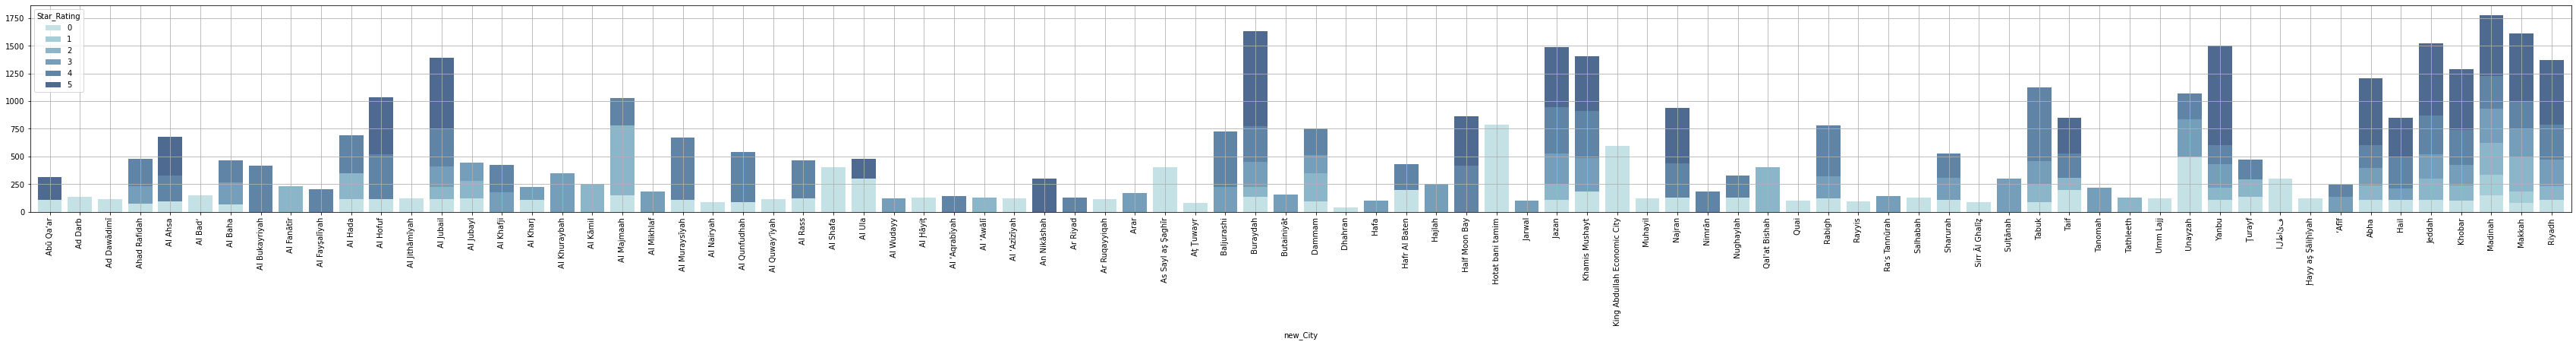

In [249]:
# Visualize the data
ax = pivoted_data.plot(kind='bar', 
                  stacked=True,
                  width=0.8, 
                  fontsize=10,
                  colormap=ListedColormap(sns.color_palette("ch:3,-.2,dark=.4")),
                  figsize=(60,5))
ax.grid(which='both')

**The Conclusion:**

The graph represents the worst cities in hotel prices. The following breifs the 10 worst:
1. Madinah
2. Buraydah
3. Makkah
4. Jeddah
5. Yanbu
6. Jazan
7. Khamis Mushayt
8. Al Jubail
9. Riyadh
10. Khobar